Final Fixed Trader Date Range: 2023-05-01 00:00:00 to 2025-05-01 00:00:00
Sentiment Date Range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
Merged Shape: (211218, 18)
Unique Sentiments: Classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64
Summary by Market Sentiment:


,Classification,Avg Closed PnL,Avg Trade Size (USD),Avg Leverage
0,Extreme Fear,34.537862,5349.731843,-2322.304587
1,Extreme Greed,67.892861,3112.251565,19518.990812
2,Fear,54.290400,7816.109931,8709.824822
3,Greed,42.743559,5736.884375,-151088.546635
4,Neutral,34.307718,4782.732661,144.002263


/tmp/ipython-input-23-2739850897.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Classification', y='Avg Closed PnL', palette='coolwarm')


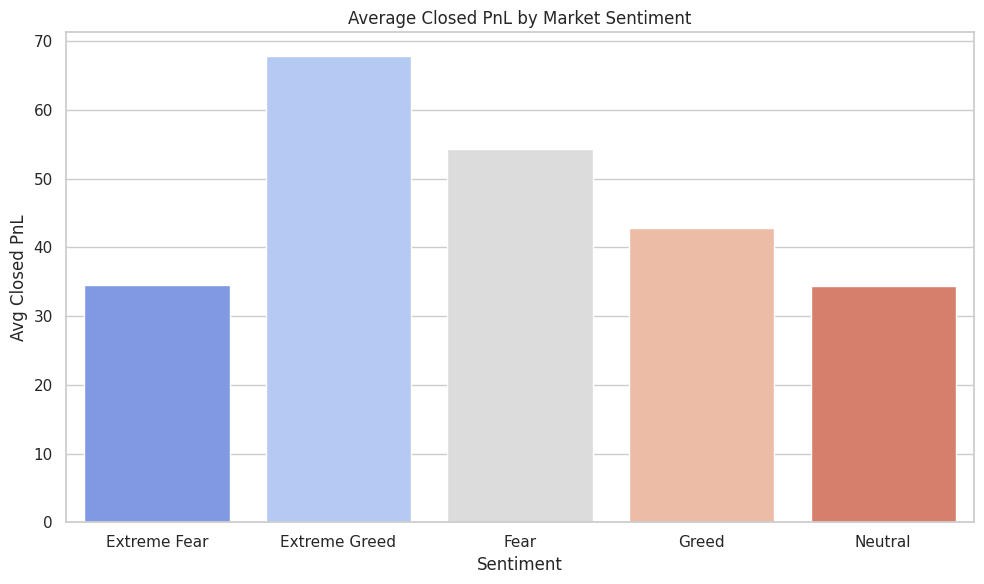

/tmp/ipython-input-23-2739850897.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Classification', y='Avg Trade Size (USD)', palette='viridis')


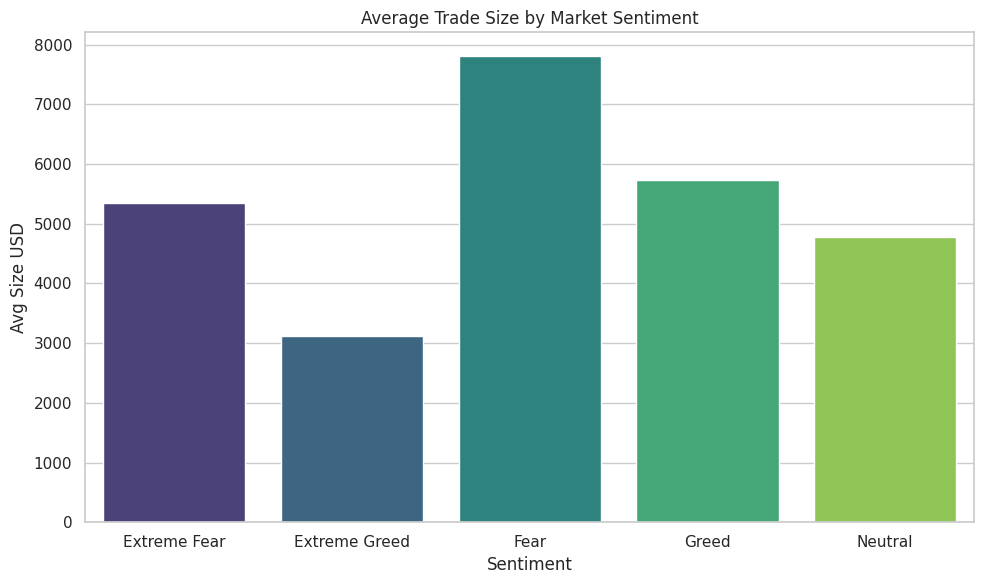

/tmp/ipython-input-23-2739850897.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Classification', y='Avg Leverage', palette='magma')


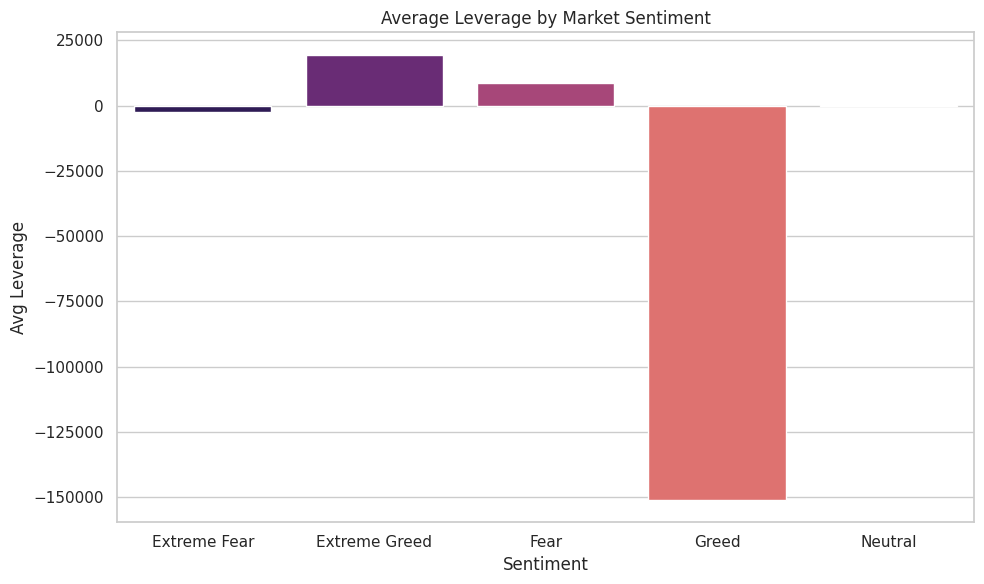

In [23]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# STEP 2: Load Datasets
trader_df = pd.read_csv('/content/trader_data.csv')
sentiment_df = pd.read_csv('/content/market_sentiment.csv')

# STEP 3: Clean Column Names
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()

# STEP 4: Parse Dates Properly

# Fix timestamp using 'Timestamp IST' with correct format
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Convert sentiment 'date' to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# Rename for consistency
sentiment_df.rename(columns={'date': 'Date', 'classification': 'Classification'}, inplace=True)

# Extract just date from trader timestamp
trader_df['Date'] = trader_df['Timestamp'].dt.date
trader_df['Date'] = pd.to_datetime(trader_df['Date'])

# Confirm fixed ranges
print("Final Fixed Trader Date Range:", trader_df['Date'].min(), "to", trader_df['Date'].max())
print("Sentiment Date Range:", sentiment_df['Date'].min(), "to", sentiment_df['Date'].max())

# STEP 5: Merge Datasets
merged_df = pd.merge(
    trader_df,
    sentiment_df[['Date', 'Classification']],
    on='Date',
    how='inner'  # only dates that exist in both
)

# Drop if classification is missing
merged_df = merged_df.dropna(subset=['Classification'])

# Clean Classification values
merged_df['Classification'] = merged_df['Classification'].astype(str).str.strip().str.title()

# Check result
print("Merged Shape:", merged_df.shape)
print("Unique Sentiments:", merged_df['Classification'].value_counts())

# STEP 6: Group Summary Statistics
grouped = merged_df.groupby('Classification').agg({
    'Closed PnL': 'mean',
    'Size USD': 'mean',
    'Start Position': 'mean'
}).reset_index()

grouped.rename(columns={
    'Closed PnL': 'Avg Closed PnL',
    'Size USD': 'Avg Trade Size (USD)',
    'Start Position': 'Avg Leverage'
}, inplace=True)

print("Summary by Market Sentiment:")
display(grouped)

# STEP 7: Plotting & Save

# Plot 1: Avg Closed PnL
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Classification', y='Avg Closed PnL', palette='coolwarm')
plt.title('Average Closed PnL by Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.savefig('avg_pnl_by_sentiment.png')
plt.show()

# Plot 2: Avg Trade Size
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Classification', y='Avg Trade Size (USD)', palette='viridis')
plt.title('Average Trade Size by Market Sentiment')
plt.ylabel('Avg Size USD')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.savefig('avg_trade_size_by_sentiment.png')
plt.show()

# Plot 3: Avg Leverage
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Classification', y='Avg Leverage', palette='magma')
plt.title('Average Leverage by Market Sentiment')
plt.ylabel('Avg Leverage')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.savefig('avg_leverage_by_sentiment.png')
plt.show()
